----
<img src="../../files/refinitiv.png" width="20%" style="vertical-align: top;">

# Data Library for Python

----

## Access layer - Search templates examples - Equity Search

This notebook illustrates the Search Template functionality of the Refinitiv Data Library. The "Equity" template shown here are template examples that you can modify and adapt to your needs. They are defined in the "search-templates.config.json" configuration file. Below is a brief description of the parameters you can use for each template definition.

**Search templates are defined using the following JSON structure:**

- **description** (string): Description of the template.
- **parameters** (object): Parameters of the template. These parameters can be used as placeholders in the request_body of the template and as named parameters of the search() method of the template. Each parameter has a name, a description, and an optional default value.
- **request_body** (object): Body of the request sent to the Search REST API. This request body can include template parameters surrounded by '#{' and '}' (for example:  “#{my_param}”). More details on the structure of the request body can be found in the [Search API reference guide](https://apidocs.refinitiv.com/Apps/ApiDocs#/details/L2Rpc2NvdmVyeS9zZWFyY2gvdjE=/Lw==/POST/README) (access to this guide requires a Refinitiv Workspace account or RDP account to log in).
  
**Template example:**
  
```json
"MyTemplate": {
    "description": "Search template example.",
    "parameters": {
        "name": {
            "description": "Name of the person to search for.",
            "default": "Edison"
        }
    },
    "request_body": {
       "Query": "#{name}",
       "View":"People",
       "Top":10
    }
} 
```  

**Example of usage:**

```  
rd.discovery.search_templates["MyTemplate"].search(name="Pasteur")
```  
  

#### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

#### Learn more

To learn more about the Refinitiv Data Library for Python please join the Refinitiv Developer Community. By [registering](https://developers.refinitiv.com/iam/register) and [logging](https://developers.refinitiv.com/content/devportal/en_us/initCookie.html) into the Refinitiv Developer Community portal you will have free access to a number of learning materials like 
 [Quick Start guides](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start), 
 [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/learning), 
 [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/docs)
 and much more.

#### Getting Help and Support

If you have any questions regarding using the API, please post them on 
the [Refinitiv Data Q&A Forum](https://community.developers.refinitiv.com/spaces/321/index.html). 
The Refinitiv Developer Community will be happy to help. 

## Set the configuration file location
For a better ease of use, you have the option to set initialization parameters of the Refinitiv Data Library in the _refinitiv-data.config.json_ configuration file. This file must be located beside your notebook, in your user folder or in a folder defined by the _RD_LIB_CONFIG_PATH_ environment variable. The _RD_LIB_CONFIG_PATH_ environment variable is the option used by this series of examples. The following code sets this environment variable.      

In [ ]:
import os
os.environ["RD_LIB_CONFIG_PATH"] = "../../../Configuration"

## Some Imports to start with

In [1]:
import refinitiv.data as rd
import cufflinks

## Open the data session

The open_session() function creates and open sessions based on the information contained in the refinitiv-data.config.json configuration file. Please edit this file to set the session type and other parameters required for the session you want to open.

In [2]:
rd.open_session()

<refinitiv.data.session.Definition object at 0x7f7f0cd87460 {name='workspace'}>

## Load the search templates configuration file

In [7]:
rd.load_config("search-templates.config.json")

<ConfigurationSet: 0x7f7f0a688850>

## Equities Search Template example

### Access the template

In [8]:
equity = rd.discovery.search_templates["Equity"]

### Get help about this template

In [9]:
help(equity)

Help on SearchTemplate in module refinitiv.data.discovery._search_templates:

<SearchTemplate 'Equity'>
    Search for Ordinary Shares of a particular exchange.
    
    Methods
    -------
    search
        exchange_name
            Name of the exchange where this equity is traded. For example: 'London Stock Exchange', 'Euronext Paris', 'Shanghai Stock Exchange', 'The Toronto Stock Exchange', 'NYSE Consolidated', etc.
    
        what
            What to search for
            default: ''



### Use the predefined parameters of the template to search for Equities of the London Stock Exchange

In [10]:
lse_equities = equity.search(exchange_name="London Stock Exchange")
display(lse_equities)

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
0,Shell PLC,London Stock Exchange,SHEL.L,184798835503.0,171966000000.0,5.87878,0.566431,1.328381,4.78817,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,A:1L,British Penny,AC,QUOTExEQUITY,21264014,GB00BP6MXD84,G80827101,BP6MXD8,<NA>,NaN
1,BP PLC,London Stock Exchange,BP.L,95339653075.0,75442000000.0,<NA>,0.68518,1.263862,-0.57601,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,A:1L,British Penny,AC,QUOTExEQUITY,829400,GB0007980591,G12793108,0798059,<NA>,NaN
2,Glencore PLC,London Stock Exchange,GLEN.L,71482438695.0,39931000000.0,5.010718,0.710478,1.903945,1.20056,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,British Penny,AC,QUOTExEQUITY,86386483,JE00B4T3BW64,G39420107,B4T3BW6,<NA>,NaN
3,AstraZeneca PLC,London Stock Exchange,AZN.L,170093321802.0,39268000000.0,<NA>,0.627127,0.364302,-0.84387,"Health Care/Pharmaceuticals, Biotechnology & L...",...,A:1L,British Penny,AC,QUOTExEQUITY,1049533,GB0009895292,G0593M107,0989529,<NA>,NaN
4,HSBC Holdings PLC,London Stock Exchange,HSBA.L,105008457539.0,175836000000.0,8.387408,0.930094,0.924488,0.68413,Financials/Banks/Banks/Diversified Banks,...,A:1L,British Penny,AC,QUOTExEQUITY,1049324,GB0005405286,G4634U169,0540528,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,IWG Plc,London Stock Exchange,IWGl.TRE,1475369189.0,<NA>,NaN,<NA>,NaN,-0.16891,Real Estate/Real Estate/Real Estate Management...,...,A:1L,British Penny,AC,QUOTExEQUITY,279328150,JE00BYVQYS01,G4969N103,<NA>,<NA>,NaN
4996,Synthomer PLC,London Stock Exchange,SYNTl.TRE,538140068.0,1137334940.0,NaN,0.578522,NaN,0.2021,Materials/Materials/Chemicals/Specialty Chemicals,...,A:1L,British Penny,AC,QUOTExEQUITY,279328163,GB0009887422,G8650C102,<NA>,<NA>,NaN
4997,Pennon Group PLC,London Stock Exchange,PNNl.TRE,2269013800.0,1422087100.0,NaN,0.760939,NaN,0.05779,Utilities/Utilities/Water Utilities/Water Util...,...,A:1L,British Penny,AC,QUOTExEQUITY,279328173,GB00BNNTLN49,G8295T239,<NA>,<NA>,NaN
4998,Shaftesbury PLC,London Stock Exchange,SHBl.TRE,1559409668.0,2647458660.0,NaN,0.293124,NaN,1.01592,Real Estate/Real Estate/Equity Real Estate Inv...,...,A:1L,British Penny,AC,QUOTExEQUITY,279328175,GB0007990962,G80603106,<NA>,<NA>,NaN


### Experiment with the returned DataFrame 

#### Define a function to plot and display data

In [11]:
def plot_and_display(df, column_name):
    df = df.sort_values(column_name,ascending = False)
    df[['DTSubjectName', column_name]].iplot(x='DTSubjectName')
    display(df)

#### Get the Equities by Market Cap

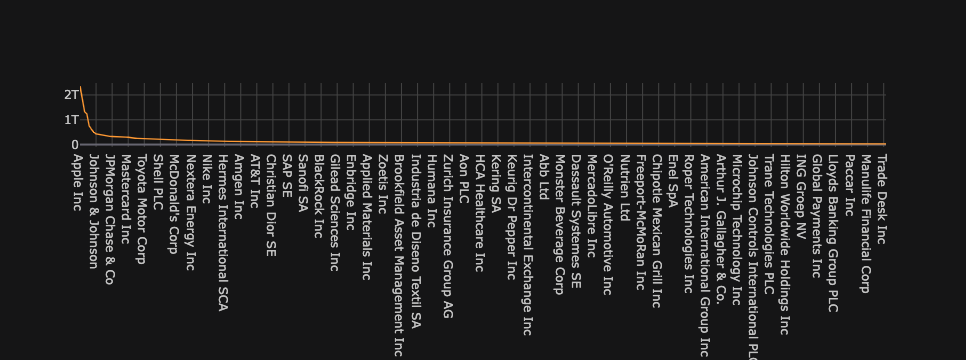

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
1870,Apple Inc,London Stock Exchange,0R2V.L,2352758092800.0,63090000000.0,24.205381,0.820257,0.990305,6.05196,Information Technology/Technology Hardware & E...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285518846,US0378331005,<NA>,B0YQ5W0,037833100,NaN
3056,Apple Inc,London Stock Exchange,APCde.TRE,2352758092800.0,63090000000.0,<NA>,0.820257,<NA>,6.05196,Information Technology/Technology Hardware & E...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519007,US0378331005,<NA>,<NA>,037833100,NaN
1871,Microsoft Corp,London Stock Exchange,0QYP.L,1858506654502.0,166542000000.0,25.853524,0.54352,0.633312,9.64472,Information Technology/Software & Services/Sof...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285518884,US5949181045,<NA>,B10RVH1,594918104,NaN
3064,Microsoft Corp,London Stock Exchange,MSFde.TRE,1858506654502.0,166542000000.0,<NA>,0.54352,<NA>,9.64472,Information Technology/Software & Services/Sof...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519023,US5949181045,<NA>,<NA>,594918104,NaN
3152,Alphabet Inc,London Stock Exchange,ABECde.TRE,1327921690000.0,<NA>,<NA>,<NA>,<NA>,5.376038,Communication Services/Media & Entertainment/I...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519045,US02079K1079,<NA>,<NA>,02079K107,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3790,Alcon AG,London Stock Exchange,0A0D.L,30279650681.0,19256000000.0,<NA>,0.312261,<NA>,0.92492,Health Care/Health Care Equipment & Services/H...,...,A:1L,Swiss Franc,AC,QUOTExEQUITY,360893944,CH0432492467,H01301128,BK8Y5Z3,<NA>,NaN
4689,Alcon AG,London Stock Exchange,2U3sg.TRE,30279650681.0,19256000000.0,<NA>,0.312261,<NA>,0.92492,Health Care/Health Care Equipment & Services/H...,...,A:1L,Swiss Franc,AC,QUOTExEQUITY,360893948,CH0432492467,H01301128,<NA>,<NA>,NaN
4113,Trade Desk Inc,London Stock Exchange,0LF5.L,30174195832.0,1527306000.0,<NA>,0.573061,<NA>,0.06588,Communication Services/Media & Entertainment/M...,...,A:1L,US Dollar,AC,QUOTExEQUITY,288061431,US88339J1051,<NA>,BG060N2,88339J105,NaN
4240,Datadog Inc,London Stock Exchange,3QDtg1.TRE,30097149290.0,1041203000.0,<NA>,0.562666,<NA>,0.01798,Information Technology/Software & Services/Sof...,...,A:1L,US Dollar,AC,QUOTExEQUITY,514648095,US23804L1035,<NA>,<NA>,23804L103,NaN


In [12]:
equities = lse_equities.query("MktCapCompanyUsd >= 30_000_000_000")
plot_and_display(equities, "MktCapCompanyUsd")

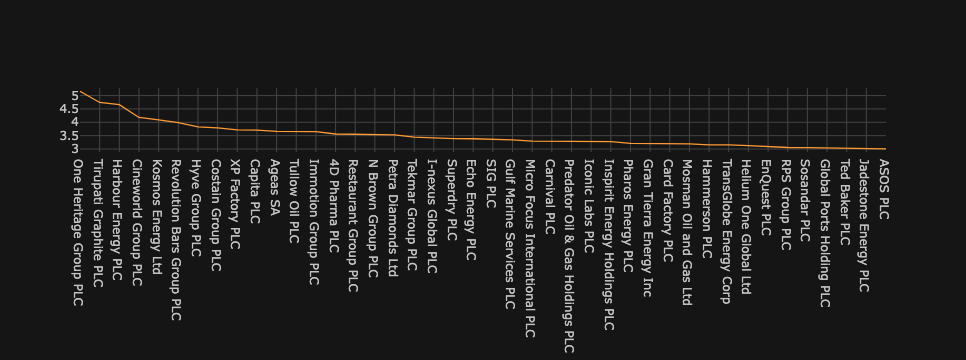

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
1683,One Heritage Group PLC,London Stock Exchange,OHG.L,9710388.0,<NA>,<NA>,<NA>,5.163173,<NA>,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,483172709,GB00BLF79495,G67514102,BLF7949,<NA>,<NA>
838,Tirupati Graphite PLC,London Stock Exchange,TGRT.L,35498228.0,9128984.0,<NA>,0.176383,4.742009,-0.0266,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,British Penny,AC,QUOTExEQUITY,464325981,GB00BFYMWJ95,G8T09D107,BFYMWJ9,<NA>,<NA>
82,Harbour Energy PLC,London Stock Exchange,HBR.L,4366451804.0,473500000.0,5.112381,0.967355,4.659199,1.07976,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,A:1L,British Penny,AC,QUOTExEQUITY,1080131,GB00BMBVGQ36,G4289T111,BMBVGQ3,<NA>,<NA>
519,Cineworld Group PLC,London Stock Exchange,CINE.L,37346335.0,-345000000.0,<NA>,1.033267,4.181223,-0.25085,Communication Services/Media & Entertainment/E...,...,A:1L,British Penny,AC,QUOTExEQUITY,33010318,GB00B15FWH70,G219AH100,B15FWH7,<NA>,<NA>
2787,Kosmos Energy Ltd,London Stock Exchange,KOS.L,2785190068.0,<NA>,16.817554,<NA>,4.090578,0.40179,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,A:1L,British Penny,AC,QUOTExEQUITY,269548375,US5006881065,<NA>,BJ1MZF7,500688106,<NA>
1034,Revolution Bars Group PLC,London Stock Exchange,RBG.L,27337286.0,-28151634.0,<NA>,1.213262,3.984417,-0.037006,Consumer Discretionary/Consumer Services/Hotel...,...,A:1L,British Penny,AC,QUOTExEQUITY,181974050,GB00BVDPPV41,G7546B104,BVDPPV4,<NA>,<NA>
584,Hyve Group PLC,London Stock Exchange,HYVE.L,182231237.0,152938242.0,<NA>,0.627912,3.831279,-0.15787,Communication Services/Media & Entertainment/M...,...,A:1L,British Penny,AC,QUOTExEQUITY,1082258,GB00BKP36R26,G4690X123,BKP36R2,<NA>,<NA>
982,Costain Group PLC,London Stock Exchange,COSG.L,121855002.0,222044200.0,<NA>,0.626221,3.793154,-0.02266,Industrials/Capital Goods/Construction & Engin...,...,A:1L,British Penny,AC,QUOTExEQUITY,1079935,GB00B64NSP76,G24472204,B64NSP7,<NA>,<NA>
1201,XP Factory PLC,London Stock Exchange,XPF.L,22233175.0,24343408.0,<NA>,0.554473,3.712753,-0.00765,Consumer Discretionary/Consumer Services/Hotel...,...,A:1L,British Penny,AC,QUOTExEQUITY,229781424,GB00BDB79J29,G2816A100,BDB79J2,<NA>,<NA>
347,Capita PLC,London Stock Exchange,CPI.L,510797109.0,306287100.0,<NA>,0.905645,3.708807,-0.01717,Information Technology/Software & Services/IT ...,...,A:1L,British Penny,AC,QUOTExEQUITY,1049459,GB00B23K0M20,G1846J115,B23K0M2,<NA>,<NA>


In [13]:
equities = lse_equities.query("Beta >= 3")
plot_and_display(equities, "Beta")

#### Get the Equities by Share Holders Equity

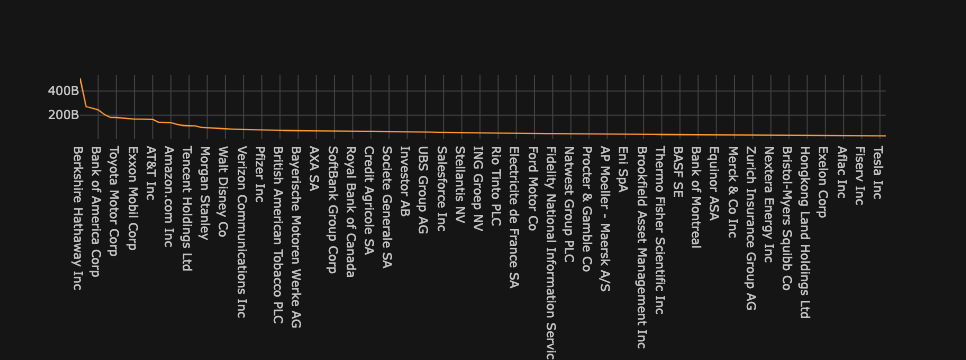

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
3202,Berkshire Hathaway Inc,London Stock Exchange,BRYNde.TRE,615851188993.0,506199000000.0,<NA>,0.462934,<NA>,39.8,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,286567046,US0846707026,<NA>,<NA>,084670702,NaN
2214,Berkshire Hathaway Inc,London Stock Exchange,0HN0.L,615851188993.0,506199000000.0,57.122179,0.462934,0.885787,7525.37854,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,288061676,US0846701086,<NA>,BG05R83,084670108,NaN
1881,Berkshire Hathaway Inc,London Stock Exchange,0R37.L,615851188993.0,506199000000.0,7.001256,0.462934,0.855168,39.8,Financials/Diversified Financials/Diversified ...,...,A:1L,US Dollar,AC,QUOTExEQUITY,286489815,US0846707026,<NA>,BSJC6M6,084670702,NaN
4682,Gazprom PAO,London Stock Exchange,RU0007661625.TRE,84337137337.0,271991949790.0,<NA>,0.376403,<NA>,88.52066,"Energy/Energy/Oil, Gas & Consumable Fuels/Inte...",...,A:1L,Euro,AC,QUOTExEQUITY,330811067,RU0007661625,X3123F106,<NA>,<NA>,NaN
1963,JPMorgan Chase & Co,London Stock Exchange,0Q1F.L,324221000941.0,259289000000.0,8.778316,0.921431,1.207057,12.45911,Financials/Banks/Banks/Diversified Banks,...,A:1L,US Dollar,AC,QUOTExEQUITY,291218221,US46625H1005,<NA>,BD39H69,46625H100,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,Canadian Imperial Bank of Commerce,London Stock Exchange,0UNI.L,40830814460.0,30353312766.0,<NA>,0.94529,<NA>,6.962285,Financials/Banks/Banks/Diversified Banks,...,A:1L,Canadian Dollar,AC,QUOTExEQUITY,288201907,CA1360691010,<NA>,BD6T9C6,136069101,<NA>
3062,Tesla Inc,London Stock Exchange,TL0de.TRE,754570921536.0,30189000000.0,<NA>,0.491671,<NA>,2.777057,Consumer Discretionary/Automobiles & Component...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285519033,US88160R1014,<NA>,<NA>,88160R101,<NA>
1874,Tesla Inc,London Stock Exchange,0R0X.L,754570921536.0,30189000000.0,86.017313,0.491671,1.192191,2.777057,Consumer Discretionary/Automobiles & Component...,...,A:1L,US Dollar,AC,QUOTExEQUITY,285518916,US88160R1014,<NA>,BSJC712,88160R101,<NA>
4004,Muenchener Rueckversicherungs Gesellschaft in ...,London Stock Exchange,MUV2de.TRE,34460475899.0,30175425200.0,<NA>,0.900946,<NA>,18.663,Financials/Insurance/Insurance/Reinsurance,...,A:1L,Euro,AC,QUOTExEQUITY,279341076,DE0008430026,D55535104,<NA>,<NA>,49.784377


In [14]:
equities = lse_equities.query("ShareholdersEquityUsd >= 30_000_000_000")
plot_and_display(equities, "ShareholdersEquityUsd")

#### Get Equities by PE

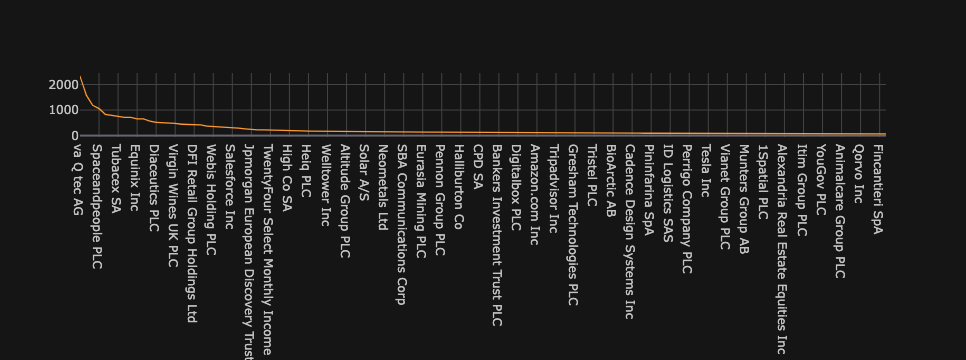

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
2448,va Q tec AG,London Stock Exchange,0RJD.L,134719976.0,50552083.0,2325.0,0.644219,<NA>,0.02576,Industrials/Capital Goods/Machinery/Industrial...,...,A:1L,Euro,AC,QUOTExEQUITY,281899196,DE0006636681,D8T66F105,BYT3WK1,<NA>,NaN
164,Darktrace PLC,London Stock Exchange,DARK.L,2527456290.0,314688000.0,1580.244856,0.568543,<NA>,0.00243,Information Technology/Software & Services/Sof...,...,A:1L,British Penny,AC,QUOTExEQUITY,507473311,GB00BNYK8G86,G2658M105,BNYK8G8,<NA>,NaN
2391,MercadoLibre Inc,London Stock Exchange,0K0E.L,47003867664.0,1531691000.0,1186.971062,0.848365,<NA>,4.72821,Consumer Discretionary/Retailing/Internet & Di...,...,A:1L,US Dollar,AC,QUOTExEQUITY,286489892,US58733R1023,<NA>,BDDXSP7,58733R102,NaN
1502,Spaceandpeople PLC,London Stock Exchange,SAL.L,2069093.0,5396008.0,1055.555556,0.577642,1.834441,0.0009,Communication Services/Media & Entertainment/M...,...,A:1L,British Penny,AC,QUOTExEQUITY,19111879,GB00BPQDJM21,G8306B110,BPQDJM2,<NA>,NaN
2847,Elica SpA,London Stock Exchange,0EA2.L,141315213.0,114744724.0,826.642336,0.75643,<NA>,0.29603,Consumer Discretionary/Consumer Durables & App...,...,A:1L,Euro,AC,QUOTExEQUITY,281899903,IT0003404214,T36140100,B28GYT0,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,Qorvo Inc,London Stock Exchange,0KSJ.L,9014871147.0,4553218000.0,73.462233,0.393638,<NA>,7.38907,Information Technology/Semiconductors & Semico...,...,A:1L,US Dollar,AC,QUOTExEQUITY,287071330,US74736K1016,<NA>,BYZHC30,74736K101,NaN
2166,Regency Centers Corp,London Stock Exchange,0KUT.L,9531162202.0,6037371000.0,72.656048,0.433876,<NA>,2.82815,Real Estate/Real Estate/Equity Real Estate Inv...,...,A:1L,US Dollar,AC,QUOTExEQUITY,287071340,US7588491032,<NA>,BYZHCD0,758849103,NaN
1491,Fair Oaks Income Ltd,London Stock Exchange,FA17.L,262098778.0,<NA>,71.299153,<NA>,<NA>,0.007924,<NA>,...,A:1L,US Dollar,AC,QUOTExEQUITY,159409848,GG00BPLGZM85,G3247H151,BPLGZM8,<NA>,NaN
1976,Fincantieri SpA,London Stock Exchange,0QWN.L,788222564.0,801228061.0,70.636215,0.908139,<NA>,-0.12604,Industrials/Capital Goods/Machinery/Constructi...,...,A:1L,Euro,AC,QUOTExEQUITY,281905295,IT0001415246,T4R92D102,BPXR7S9,<NA>,NaN


In [15]:
equities = lse_equities.query("Pe >= 70")
plot_and_display(equities, "Pe")

#### Get Equities by Debt Ratio

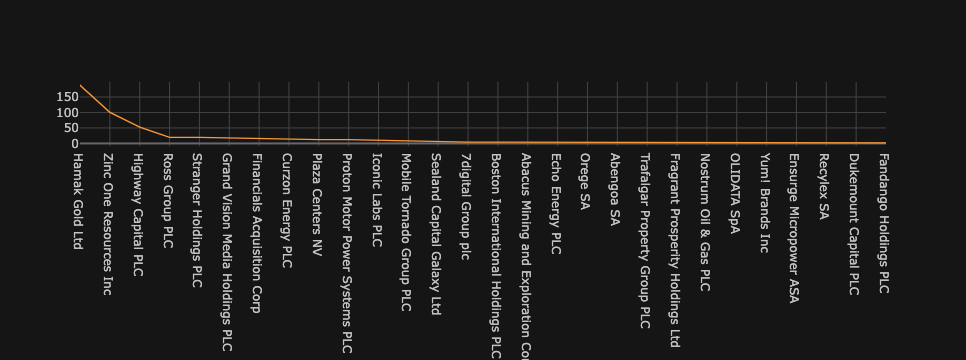

,DTSubjectName,ExchangeName,RIC,MktCapCompanyUsd,ShareholdersEquityUsd,Pe,DebtToAssets,Beta,Eps,Gics,...,RCSAssetCategory,RCSCurrencyLeaf,AssetState,BusinessEntity,PI,IssueISIN,CinCUSIP,SEDOL,CUSIP,SolvencyMargin
1658,Hamak Gold Ltd,London Stock Exchange,HAMA.L,1871480.0,-355380.0,<NA>,188.042105,<NA>,-7.11,Materials/Materials/Metals & Mining/Gold,...,A:1L,British Penny,AC,QUOTExEQUITY,588525851,VGG4256S1048,G4256S104,BMDHNP7,<NA>,<NA>
4626,Zinc One Resources Inc,London Stock Exchange,0VPH.L,740839.0,-1166945.0,<NA>,100.230481,<NA>,-0.2024,Materials/Materials/Metals & Mining/Diversifie...,...,A:1L,Canadian Dollar,AC,QUOTExEQUITY,288061531,CA98959W2031,<NA>,BM8ZS17,98959W203,<NA>
1704,Highway Capital PLC,London Stock Exchange,HWC.L,<NA>,-1862314.0,<NA>,52.450062,<NA>,-0.04733,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,1411914,GB0008579384,G8583F107,0857938,<NA>,<NA>
1614,Ross Group PLC,London Stock Exchange,RGP.L,3646629.0,-8153150.0,<NA>,19.545685,0.542996,-0.01214,Consumer Discretionary/Retailing/Distributors/...,...,A:1L,British Penny,AC,QUOTExEQUITY,1080152,GB0002192606,G7643P170,0219260,<NA>,<NA>
1711,Stranger Holdings PLC,London Stock Exchange,STHP.L,<NA>,-1112452.0,<NA>,19.462963,<NA>,-0.00444,Financials/Diversified Financials/Capital Mark...,...,A:1L,British Penny,AC,QUOTExEQUITY,248767921,GB00BYWLRL80,G8525C105,BYWLRL8,<NA>,<NA>
1710,Grand Vision Media Holdings PLC,London Stock Exchange,GVMH.L,913215.0,-4718591.0,<NA>,17.177232,-0.219072,-0.04726,Communication Services/Media & Entertainment/M...,...,A:1L,British Penny,AC,QUOTExEQUITY,248333098,GB00BDHBGL97,G816C2104,BDHBGL9,<NA>,<NA>
566,Financials Acquisition Corp,London Stock Exchange,FINSF.L,171529144.0,-910437.0,<NA>,17.008436,<NA>,-0.04354,<NA>,...,A:1L,British Penny,AC,QUOTExEQUITY,599469237,KYG3439B1032,G3439B103,BPSPGW5,<NA>,<NA>
1714,Curzon Energy PLC,London Stock Exchange,CZN.L,<NA>,-2528310.0,<NA>,14.876564,1.040802,-0.00916,"Energy/Energy/Oil, Gas & Consumable Fuels/Oil ...",...,A:1L,British Penny,AC,QUOTExEQUITY,274259345,GB00BD97ND60,G2R16E101,BD97ND6,<NA>,<NA>
1691,Plaza Centers NV,London Stock Exchange,PLAZ.L,4972163.0,-110004395.0,<NA>,12.421443,-0.269585,-3.55665,Real Estate/Real Estate/Real Estate Management...,...,A:1L,British Penny,AC,QUOTExEQUITY,28667842,NL0011882741,N7112H107,BD6SDV0,<NA>,<NA>
1375,Proton Motor Power Systems PLC,London Stock Exchange,PPS.L,155856718.0,-91116228.0,0.362188,11.990579,1.056521,0.24849,Industrials/Capital Goods/Electrical Equipment...,...,A:1L,British Penny,AC,QUOTExEQUITY,28749190,GB00BP83GZ24,G7275Z116,BP83GZ2,<NA>,<NA>


In [16]:
equities = lse_equities.query("DebtToAssets >= 2")
plot_and_display(equities, "DebtToAssets")

### Get Vodafone related equities and use get_data() to retrieve additional information 

In [17]:
vod_equities = equity.search(what="vodafone", exchange_name="London Stock Exchange")

rd.get_data(
    universe=vod_equities['RIC'].to_list(),
    fields=['TR.HeadquartersCountry', 'TR.CompanySharesOutDate', 'TR.Revenue']
)

,Instrument,Country of Headquarters,Shares O/S Date,Revenue
0,VOD.L,United Kingdom,2022-10-06,45580000000
1,VODl.TRE,United Kingdom,2022-10-06,45580000000
2,0QBL.L,Iceland,2022-10-06,21765000000
3,0QBLic.TRE,Iceland,2022-10-06,21765000000
4,AU0000090128.TRE,Australia,2022-10-07,5338000000


## Close the session

In [18]:
rd.close_session()